# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 29, 2020

# Hidden Markov Models

![](https://i.imgur.com/mGrXgYZ.png)
# Part 1: Some derivations

In this lab we will take a look at Gaussian HMMs. As presented in lecture, in Gaussian HMMs, we have a sequence of observations $\mathbf{x}_1, \ldots, \mathbf{x}_T$ and a sequence of states $\mathbf{z}_0, \ldots, \mathbf{z}_T$.


Markov assumption: $p(\mathbf{z}_t | \mathbf{z}_{t-1}, \ldots, \mathbf{z}_{0}) = p(\mathbf{z}_t | \mathbf{z}_{t-1})$. 

Initial assignment: $p(\mathbf{z}_0 = k) = \pi_k$ with $\sum_{k=1}^q \pi_k = 1$.

Transition probability: $p(\mathbf{z}_t = k | \mathbf{z}_{t-1} = j) = A_{jk}$ where $\sum_{k=1}^qA_{jk} = 1$.

Conditional independence: $p(\mathbf{x}_t | \mathbf{z}_{0}, \ldots, \mathbf{z}_{T}, \mathbf{x}_1, \ldots,  \mathbf{x}_{t-1}, \mathbf{x}_{t+1}, \ldots, \mathbf{x}_T) = p(\mathbf{x}_t | \mathbf{z}_{t})$. 

The emission probability: $p(\mathbf{x}_t | \mathbf{z}_{t} = k)= \mathcal{N}(\mathbf{x}_t | \mu_k, I_k).$

### Learning: EM for HMM (Baum-Welch Algorithm)

__Idea__: A way to do Maximum Likelihood Estimation when some data is missing. In our case this data are the unobserved states (cluster assignments) $\mathbf{Z}$.


__Goal__: Given a set of $N$ data samples $\mathcal{X} = \{X^{(1)},\ldots, X^{(N)}\}$, where each data sample is a sequence of observations $X^{(n)} = \{\mathbf{x}_1^{(n)}, \ldots, \mathbf{x}_{T_n}^{(n)}\}$ compute the parameters of the transition probabilities $p(\mathbf{z}_t|\mathbf{z}_{t+1})= A$ as well as the emission probabilities $p(\mathbf{x}_t | \mathbf{z}_{t})$ with means $\{\mu_{1}, \ldots, \mu_{q}\}$.


Log likelihood estimation:

### $$\mathcal{L}(\mathcal{X}) = \sum_{n=1}^N\Big( \sum_{t=1}^{T_n} \sum_{k=1}^q \Big(p(\mathbf{z}_t^{(n)} = k~|~X^{(n)})\Big( -\frac{1}{2}\| \mathbf{x}_t^{(n)} - \mu_k\|^2_2\Big) +  \sum_{j=1}^q p(\mathbf{z}_t = k, \mathbf{z}_{t-1} = j~|~ X^{(n)})\log A_{jk} \Big)  \Big)$$

At each iteration of the EM algorith, we perform an expectation step followed by a maximization step.

__$E$-step (Expectation)__

Estimate the posterior distribution over states $\mathbf{z}$ given the observations.

1. Compute the per-step posterior: $p(\mathbf{z}_t^{(n)} | \mathbf{x}_1^{(n)}, \ldots, \mathbf{x}_T^{(n)} ) = \gamma_t(\mathbf{z}_t)$.

2. Compute the per-pair posterior:  $p( \mathbf{z}_{t-1}^{(n)}, \mathbf{z}_t^{(n)} | \mathbf{x}_1^{(n)}, \ldots, \mathbf{x}_T^{(n)})=\varepsilon_t(\mathbf{z}_{t-1}, \mathbf{z}_{t})$.


__$M$-step (Maximization)__

Update the parameters of the model to maximize the negative log likelihood of the data. 

### $$\hat{\mu}_k = \frac{\sum_{n=1}^N\sum_{t=1}^{T_n} \gamma_{t}^{(n)}(\mathbf{z}_t = k)\mathbf{x}_t^{(n)} }{\sum_{n=1}^N\sum_{t=1}^{T_n}\gamma_{t}^{(n)}(\mathbf{z}_t = k)}$$

### $$\hat{A}_{ij} = \frac{\sum_{n=1}^N\sum_{t=1}^{T_n} \varepsilon_{t}^{(n)}(\mathbf{z}_{t-1} = i, \mathbf{z}_{t} = j)}{\sum_{n=1}^N\sum_{k=1}^q\sum_{t=1}^{T_n}\varepsilon_{t}^{(n)}(\mathbf{z}_{t-1} = i, \mathbf{z}_{t} = k)}$$

### Link to GMMs

![](https://i.imgur.com/15QuXPJ.png)

In the Gaussian Mixture Model, the states are correlated and the observations are expressed as a mixture of clusters.

### $$ \mathbf{z}_i\perp \mathbf{z}_j, i\neq j.$$
### $$ p(\mathbf{x}_i) = \sum_{k \in  \mathbf{z}_i} p(\mathbf{x}_i, \mathbf{z}_i = k) = \sum_{\mathbf{z}_i} p(\mathbf{z}_i) \cdot \mathscr{N}(\mathbf{x}_i; \mathbf{\mu}_{\mathbf{z}_i}, \Sigma_{ \mathbf{z}_i}).$$

### Inference: Forward-Backward Algorithm ($\alpha$-$\beta$ Algorithm)

We are interested in the probability of hidden states given observations, more specifically: $p(\mathbf{z}_t | \mathbf{x}_1, \ldots, \mathbf{x}_T )$ for $t$ such that $1\leq t< T$ assuming we know $p(\mathbf{z}_t  | \mathbf{z}_{t-1}) $ and $p(\mathbf{x}_t | \mathbf{z}_{t})$ .


From Bayes: 

$$p(\mathbf{z}_t | \mathbf{x}_1, \ldots, \mathbf{x}_T ) = \frac{p(\mathbf{z}_t , \mathbf{x}_1, \ldots, \mathbf{x}_T )}{p( \mathbf{x}_1, \ldots, \mathbf{x}_T )}\propto p(\mathbf{z}_t , \mathbf{x}_1, \ldots, \mathbf{x}_T ).$$

Consider the numerator:

$$p(\mathbf{z}_t , \mathbf{x}_1, \ldots, \mathbf{x}_T ) = p( \mathbf{x}_1, \ldots, \mathbf{x}_T | \mathbf{z}_t) p(\mathbf{z}_t)$$
$$=  p( \mathbf{x}_1, \ldots, \mathbf{x}_t | \mathbf{z}_t)  p(\mathbf{z}_t) p( \mathbf{x}_{t+1}, \ldots, \mathbf{x}_T | \mathbf{z}_t)$$
$$= p( \mathbf{x}_1, \ldots, \mathbf{x}_t | \mathbf{z}_t) p(\mathbf{z}_t) p( \mathbf{x}_{t+1}, \ldots, \mathbf{x}_T | \mathbf{z}_t)$$
$$= p( \mathbf{x}_1, \ldots, \mathbf{x}_t, \mathbf{z}_t)  p( \mathbf{x}_{t+1}, \ldots, \mathbf{x}_T | \mathbf{z}_t).$$

Let $\alpha(\mathbf{z}_t) = p( \mathbf{x}_1, \ldots, \mathbf{x}_t, \mathbf{z}_t) $ and $\beta(\mathbf{z}_t) =  p( \mathbf{x}_{t+1}, \ldots, \mathbf{x}_T | \mathbf{z}_t) $. 

Note that: $p(\mathbf{z}_t | \mathbf{x}_1, \ldots, \mathbf{x}_T )\propto\alpha(\mathbf{z}_t)\beta(\mathbf{z}_t).$

#### Forward

Consider $\alpha(\mathbf{z}_t)$:

$\alpha(\mathbf{z}_t) = p( \mathbf{x}_1, \ldots, \mathbf{x}_t, \mathbf{z}_t)$

$= \sum_{ \mathbf{z}_{t-1}} p( \mathbf{x}_1, \ldots, \mathbf{x}_t, \mathbf{z}_t,\mathbf{z}_{t-1})$

$= \sum_{ \mathbf{z}_{t-1}} p( \mathbf{x}_1, \ldots, \mathbf{x}_{t-1}, \mathbf{z}_{t-1}) p(  \mathbf{x}_{t}, \mathbf{z}_t |  \mathbf{x}_1, \ldots, \mathbf{x}_{t-1}, \mathbf{z}_{t-1})$

$= \sum_{ \mathbf{z}_{t-1}} p( \mathbf{x}_1, \ldots, \mathbf{x}_{t-1}, \mathbf{z}_{t-1})  p(\mathbf{x}_{t} |\mathbf{x}_1, \ldots, \mathbf{x}_{t-1}, \mathbf{z}_{t-1}, \mathbf{z}_t )  p( \mathbf{z}_t | \mathbf{x}_1, \ldots, \mathbf{x}_{t-1}, \mathbf{z}_{t-1}) $

$= \sum_{ \mathbf{z}_{t-1}} p( \mathbf{x}_1, \ldots, \mathbf{x}_{t-1}, \mathbf{z}_{t-1})  p(\mathbf{x}_{t} |\mathbf{z}_t )  p( \mathbf{z}_t | \mathbf{z}_{t-1}) $

$= p(\mathbf{x}_{t} | \mathbf{z}_t)  \sum_{ \mathbf{z}_{t-1}} \alpha(\mathbf{z}_{t-1}) p( \mathbf{z}_t | \mathbf{z}_{t-1}).$

Note that the initial value is: $\alpha(\mathbf{z}_1) = p(\mathbf{x}_1, \mathbf{z}_1) = p(\mathbf{x}_1|\mathbf{z}_1)p(\mathbf{z}_1)$. Then we can compute the rest of the $\alpha(\mathbf{z}_t)$ recursively.

#### Backward

Consider $\beta(\mathbf{z}_t)$:

$\beta(\mathbf{z}_t) =  p( \mathbf{x}_{t+1}, \ldots, \mathbf{x}_T | \mathbf{z}_t) $

$ = \sum_{\mathbf{z}_{t+1}} p( \mathbf{x}_{t+1}, \ldots, \mathbf{x}_T, \mathbf{z}_{t+1} | \mathbf{z}_t)$

$ = \sum_{\mathbf{z}_{t+1}} p( \mathbf{x}_{t+1}, \ldots, \mathbf{x}_T |  \mathbf{z}_{t+1}, \mathbf{z}_t)p( \mathbf{z}_{t+1}|  \mathbf{z}_{t})$ 

$ = \sum_{\mathbf{z}_{t+1}} p( \mathbf{x}_{t+2}, \ldots, \mathbf{x}_T |  \mathbf{z}_{t+1}, \mathbf{z}_t, \mathbf{x}_{t+1})p(\mathbf{x}_{t+1} | \mathbf{z}_{t+1}, \mathbf{z}_t)p( \mathbf{z}_{t+1}|  \mathbf{z}_{t})$ 

$ = \sum_{\mathbf{z}_{t+1}} p( \mathbf{x}_{t+2}, \ldots, \mathbf{x}_T |  \mathbf{z}_{t+1})p(\mathbf{x}_{t+1} | \mathbf{z}_{t+1})p( \mathbf{z}_{t+1}|  \mathbf{z}_{t})$ 

$ = \sum_{\mathbf{z}_{t+1}} \beta(\mathbf{z}_{t+1})p(\mathbf{x}_{t+1} | \mathbf{z}_{t+1})p( \mathbf{z}_{t+1}|  \mathbf{z}_{t}).$ 

Note that we can compute $\beta(\mathbf{z}_{T-1})$ as:  $ \beta(\mathbf{z}_{T-1})= p( \mathbf{x}_T | \mathbf{z}_{T-1}) = \sum_{\mathbf{z}_{T}} p( \mathbf{x}_T | \mathbf{z}_{T})p( \mathbf{z}_T | \mathbf{z}_{T-1}).$ Then we can compute the rest of the $\beta(\mathbf{z}_t)$ recursively.

We use the computed values $\alpha(\mathbf{z}_t)$ and $\beta(\mathbf{z}_t)$ to estimate $\gamma_t(\mathbf{z}_t)$ and $\varepsilon_t(\mathbf{z}_{t-1}, \mathbf{z}_{t})$.

### $\gamma_t(\mathbf{z}_t= k) = \frac{\alpha(\mathbf{z}_t = k) \beta(\mathbf{z}_t = k)}{p(X)}$ 

and

### $\varepsilon_t(\mathbf{z}_{t-1}= k, \mathbf{z}_{t}= j) = \frac{\alpha(\mathbf{z}_{t-1} = k)A_{k,j}p(x_{t}|\mathbf{z}_{t} = j) \beta(\mathbf{z}_t = k)}{p(X)}$.

where we can compute the likelihood $p(\mathbf{X},\mathbf{Z}) = \sum_{k=1}^q\alpha(\mathbf{z}_T = k) = \sum_{k=1}^q p(\mathbf{x}_{1}, \ldots, \mathbf{x}_T, \mathbf{z}_T = k)$.

The forward-backward algorithm is a dynamic programming algorithm, that is, an algorithm that uses a table to store intermediate values as it builds up the probability of the observation sequence.



### Inference: Viterbi Algorithm

This is the assignment step that maximize the likelohood of the data.

Goal: Find the most likely state sequence $\hat{\mathbf{z}}_{0}, \ldots, \hat{\mathbf{z}}_{T}$ that maximizes the posterior $p(\mathbf{z}_{0}, \ldots, \mathbf{z}_{T} | \mathbf{x}_1, \ldots, \mathbf{x}_T)$ given a sequence of observations $\mathbf{x}_1, \ldots, \mathbf{x}_T$.
 

$\underset{\mathbf{z}_{0}, \ldots, \mathbf{z}_{T}}{\mathrm{max}}~ p(\mathbf{z}_{0}, \ldots, \mathbf{z}_{T} | \mathbf{x}_1, \ldots, \mathbf{x}_T) = \underset{\mathbf{z}_{0}, \ldots, \mathbf{z}_{T} }{\mathrm{max}}~ p(\mathbf{z}_{0}, \ldots, \mathbf{z}_{T},  \mathbf{x}_1, \ldots, \mathbf{x}_T) $ 

$= \underset{\mathbf{z}_{0}, \ldots, \mathbf{z}_{T} }{\mathrm{max}}~ p(\mathbf{z}_{0})\prod_{i=1}^T p(\mathbf{z}_{i}|\mathbf{z}_{i-1}) p(\mathbf{x}_{i}|\mathbf{z}_{i}) $  

$= \underset{\mathbf{z}_{T} }{\mathrm{max}}~\Big[\underset{\mathbf{z}_{0}, \ldots, \mathbf{z}_{T-1} }{\mathrm{max}}~p(\mathbf{z}_{0})\prod_{i=1}^T p(\mathbf{z}_{i}|\mathbf{z}_{i-1})p(\mathbf{x}_{i}|\mathbf{z}_{i})\Big]$

$= \underset{\mathbf{z}_{T} }{\mathrm{max}}~\Big[p(\mathbf{x}_{T}|\mathbf{z}_{T})~\Big[\underset{\mathbf{z}_{0}, \ldots, \mathbf{z}_{T-1} }{\mathrm{max}}~p(\mathbf{z}_{0})\prod_{i=1}^{T-1} p(\mathbf{z}_{i}|\mathbf{z}_{i-1})p(\mathbf{x}_{i}|\mathbf{z}_{i})p(\mathbf{z}_T|\mathbf{z}_{T-1})\Big]\Big] $

$= \underset{\mathbf{z}_{T} }{\mathrm{max}}~\Big[p(\mathbf{x}_{T}|\mathbf{z}_{T})~\Big[\underset{\mathbf{z}_{T-1} }{\mathrm{max}}~p(\mathbf{z}_T|\mathbf{z}_{T-1})p(\mathbf{x}_{T-1}|\mathbf{z}_{T-1})
\underset{\mathbf{z}_{0}, \ldots, \mathbf{z}_{T-2} }{\mathrm{max}}~p(\mathbf{z}_{0})\prod_{i=1}^{T-2} p(\mathbf{z}_{i}|\mathbf{z}_{i-1})p(\mathbf{x}_{i}|\mathbf{z}_{i})\Big]\Big]$

$\vdots$

$= \underset{\mathbf{z}_{T} }{\mathrm{max}}~\Big[p(\mathbf{x}_{T}|\mathbf{z}_{T})~\Big[\underset{\mathbf{z}_{T-1} }{\mathrm{max}}~p(\mathbf{z}_T|\mathbf{z}_{T-1})p(\mathbf{x}_{T-1}|\mathbf{z}_{T-1})\Big[\underset{\mathbf{z}_{T-2}}{\max} \ldots\Big[\underset{\mathbf{z}_{1}}{\max}~p(\mathbf{z}_{2}|\mathbf{z}_{1})p(\mathbf{x}_{1}|\mathbf{z}_{1})\Big[\underset{\mathbf{z}_{0}}{\mathrm{max}}~p(\mathbf{z}_{0}) p(\mathbf{z}_{1}|\mathbf{z}_{0})\Big]\Big]\ldots\Big]\Big].$

Consider the nested optimization problems and start with the inner-most one.

Step 1:  For each possible value of $\mathbf{z}_1$ (there are $q$ of them), find an optimal $\mathbf{z}_0$ that maximizes $\underset{\mathbf{z}_{0}}{\mathrm{max}}~p(\mathbf{z}_{0}) p(\mathbf{z}_{1}|\mathbf{z}_{0})$ and save the results.

Step 2: For each possible value of $\mathbf{z}_2$, find an optimal $\mathbf{z}_1$ that maximizes $p(\mathbf{z}_{2}|\mathbf{z}_{1})p(\mathbf{x}_{1}|\mathbf{z}_{1})\Big[\underset{\mathbf{z}_{0}}{\mathrm{max}}~p(\mathbf{z}_{0}) p(\mathbf{z}_{1}|\mathbf{z}_{0})\Big]$ and save the results. Notice that we don’t need to search for $\mathbf{z}_0$, because we have already computed the optimal $\mathbf{z}_0$ for each $\mathbf{z}_1$ in the previous step.

Iteterate procedure for all steps $t \leq T$.


# Part 2: Demo

You could prepare the intro part where we would show again the derivations of the HMM forward, viterbi equations (practical ways to execute it using dynamic programming), EM to train it, and how this EM is similar to GMM training (additional transition model)

i would do it in a backward way as Cho presented: he started from marginal prob of each state z and then why we need it. in the lab we can go opposite ie how we do EM and here we need those marginals which we compute using forward backward

In [4]:
#! pip install librosa
import librosa
import numpy
from glob import glob
from tqdm import tqdm

/Users/kati/opt/anaconda3/envs/ml/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Users/kati/opt/anaconda3/envs/ml/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


### Data

In [7]:
# Downloading data
! wget https://nyu.box.com/shared/static/ux7gzdnigzbgws6mcpu9poy637cyqrwv.gz -O ./audio.tar.gz

--2020-04-28 00:04:51--  https://nyu.box.com/shared/static/ux7gzdnigzbgws6mcpu9poy637cyqrwv.gz
Resolving nyu.box.com... 107.152.27.197
Connecting to nyu.box.com|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/ux7gzdnigzbgws6mcpu9poy637cyqrwv.gz [following]
--2020-04-28 00:04:51--  https://nyu.box.com/public/static/ux7gzdnigzbgws6mcpu9poy637cyqrwv.gz
Reusing existing connection to nyu.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://nyu.app.box.com/public/static/ux7gzdnigzbgws6mcpu9poy637cyqrwv.gz [following]
--2020-04-28 00:04:52--  https://nyu.app.box.com/public/static/ux7gzdnigzbgws6mcpu9poy637cyqrwv.gz
Resolving nyu.app.box.com... 107.152.27.199
Connecting to nyu.app.box.com|107.152.27.199|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b1!jWY9QxiPTVMlcnayfwCMYEUFAQJWZXlqkTi21qFZNa9Cc1eus_U1I1_IpBVUSsEKTFm

In [2]:
# Unzipping audio.zip
! tar -xzf ./audio.tar.gz

In [5]:
# Read audio files
audio_files = numpy.sort(glob("./audio/*.flac"))

In [6]:
# Sound
import IPython
IPython.display.Audio(audio_files[0])

## Task: modeling a sound detector in the waveform using Hidden Markov Model

Firstly, we are loading the audio waveform and resample it at rate 22050 Hz. It takes about 3-5 minutes to load the data because of resampling procedure. 

In [9]:
# Load waveforms
waveforms = []

for af in tqdm(audio_files):
    waveforms.append(librosa.load(af))

100%|██████████| 321/321 [04:20<00:00,  1.23it/s]


In [14]:
# Reconstruct audio duration in seconds
waveforms[0][0].shape[0] / 22050

55.8

# Feature extraction

Waveform on its own is a single scalar per time step:
* Many neighboring scalars will be similar due to high sampling rate
* Windows of such scalars could represent the actual sound class better.

One way to convert waveform into a sequence of multidimensional features is Mel-scaled.

In [15]:
# Load mel-spectograms
melspectrograms = []

for wf in tqdm(waveforms):
    # the numpy.log is used to make raw plots more visible (in the end of the notebook you can see it)
    melspectrograms.append(numpy.log(10e-8+librosa.feature.melspectrogram(wf[0], sr=wf[1], n_mels=128, hop_length=512, n_fft=2048)))

100%|██████████| 321/321 [00:09<00:00, 33.79it/s]


In [16]:
# Data dimension
melspectrograms[0].shape

(128, 2404)

### Plot Mel-frequency spectogram

Populating the interactive namespace from numpy and matplotlib


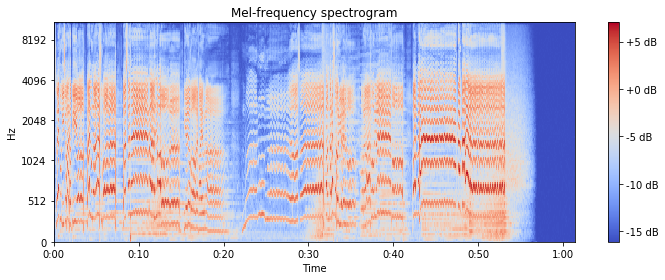

In [17]:
%pylab inline
import librosa.display

index_to_check=0 # speech
#index_to_check=50 # no speech

plt.figure(figsize=(10, 4))
librosa.display.specshow(melspectrograms[index_to_check], x_axis='time', y_axis='mel', sr=20050)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

## Comparing HMM models with different number of hidden states

Next, we will train models with 2,3,4 hidden states on the same training data.

In [18]:
# Making a held-out part of the training set to compare models on some unseen data
data_size = len(melspectrograms)
training_part = numpy.concatenate(melspectrograms[:-20], axis=1).T
training_part_lengts = [i.shape[1] for i in melspectrograms[:-20]]

validation_part = numpy.concatenate(melspectrograms[-20:], axis=1).T
validation_part_lengths = [i.shape[1] for i in melspectrograms[-20:]]

In [20]:
from hmmlearn import hmm

# Model with 2 hidden states: training
hmm_2 = hmm.GaussianHMM(n_components=2, verbose=False, algorithm='viterbi', n_iter=100, covariance_type='diag', tol=0.001).fit(training_part, training_part_lengts)

In [21]:
# Model with 2 hidden states: score
hmm_2.score(validation_part, validation_part_lengths)

-2843458.5838976144

In [22]:
# Model with 3 hidden states: training
hmm_3 = hmm.GaussianHMM(n_components=3, verbose=False, algorithm='viterbi', n_iter=100, covariance_type='diag', tol=0.001).fit(training_part, training_part_lengts)

In [23]:
# Model with 3 hidden states: score
hmm_3.score(validation_part, validation_part_lengths)

-2735408.0235469863

In [24]:
# Model with 4 hidden states: training
hmm_4 = hmm.GaussianHMM(n_components=4, verbose=False, algorithm='viterbi', n_iter=100, covariance_type='diag', tol=0.001).fit(training_part, training_part_lengts)

In [25]:
# Model with 4 hidden states: score
hmm_4.score(validation_part, validation_part_lengths)

-2694482.139041781

## Visualizing the observation and corresponding hidden state sequence

In [26]:
import matplotlib.patches as mpatches

# Function which plots the observations and the sequence of predicted hidden states
def vis_mel(hmm, mel, length_to_plot):
    plt.figure(figsize=(50,10))
    #print(melspectrograms[i][:length_to_plot, :].shape)
    plt.imshow( mel[:, :length_to_plot])
    plt.show()
    
    # Predictions
    hidden_seq = hmm.predict(mel.T)
    plt.figure(figsize=(50,10))
    #print(melspectrograms[i][:length_to_plot, :].shape)
    plt.imshow( mel[:, :length_to_plot], alpha=0.8 )
    #print(numpy.repeat(hidden_seq[None, :length_to_plot], 128, axis=0).shape)
    hid = plt.imshow( numpy.repeat(hidden_seq[None, :length_to_plot], 128, axis=0) , alpha=0.3)
    
    values = numpy.unique(hidden_seq.ravel())
    colors = [ hid.cmap(hid.norm(value)) for value in values]
    patches = [ mpatches.Patch(color=colors[i], label="State {l}".format(l=values[i]) ) for i in range(len(values)) ]
    
    plt.legend(handles=patches, loc=2, borderaxespad=0. )
    
    plt.show()

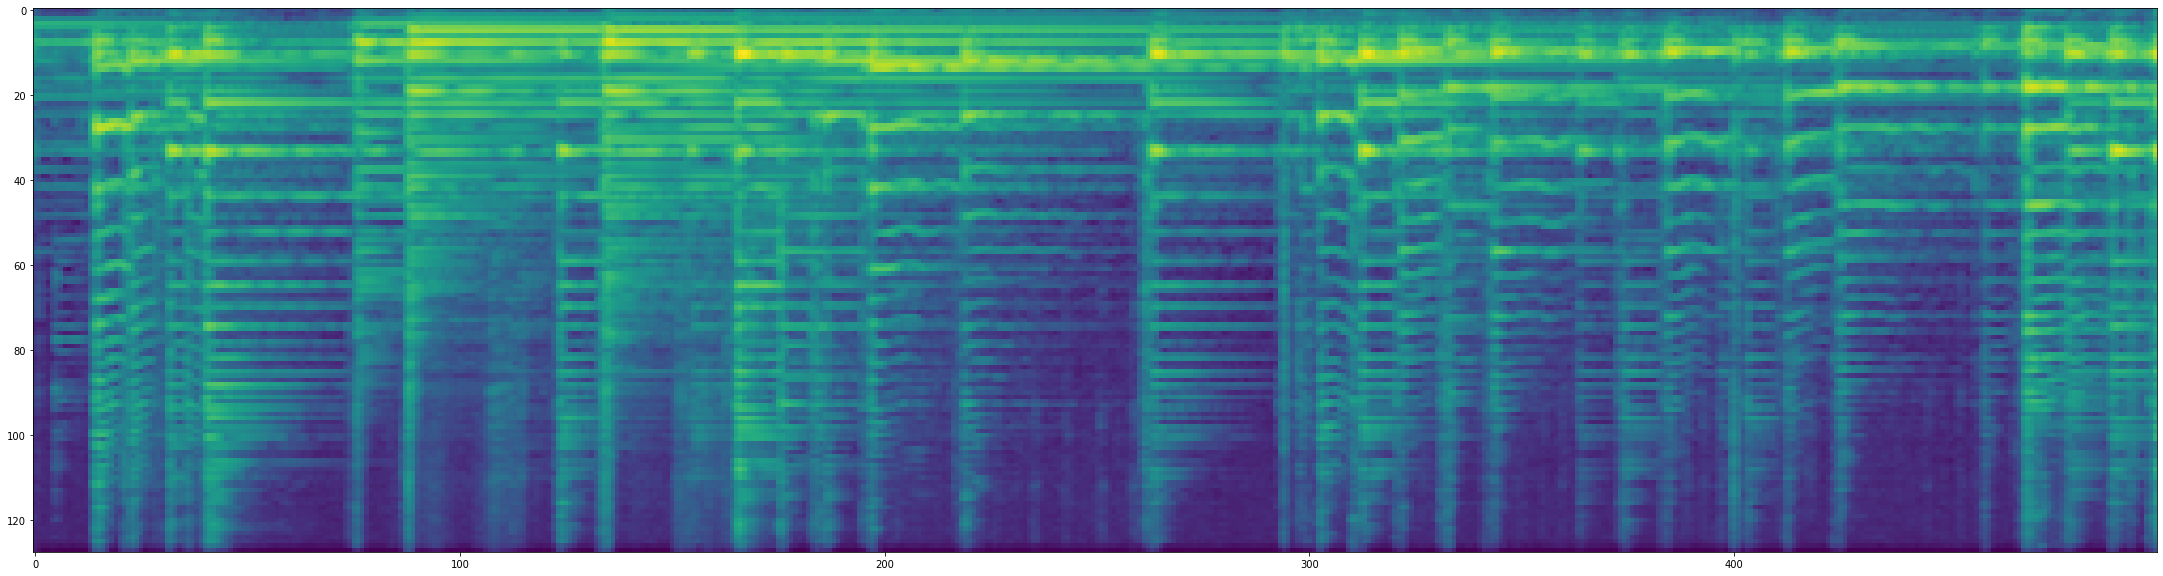

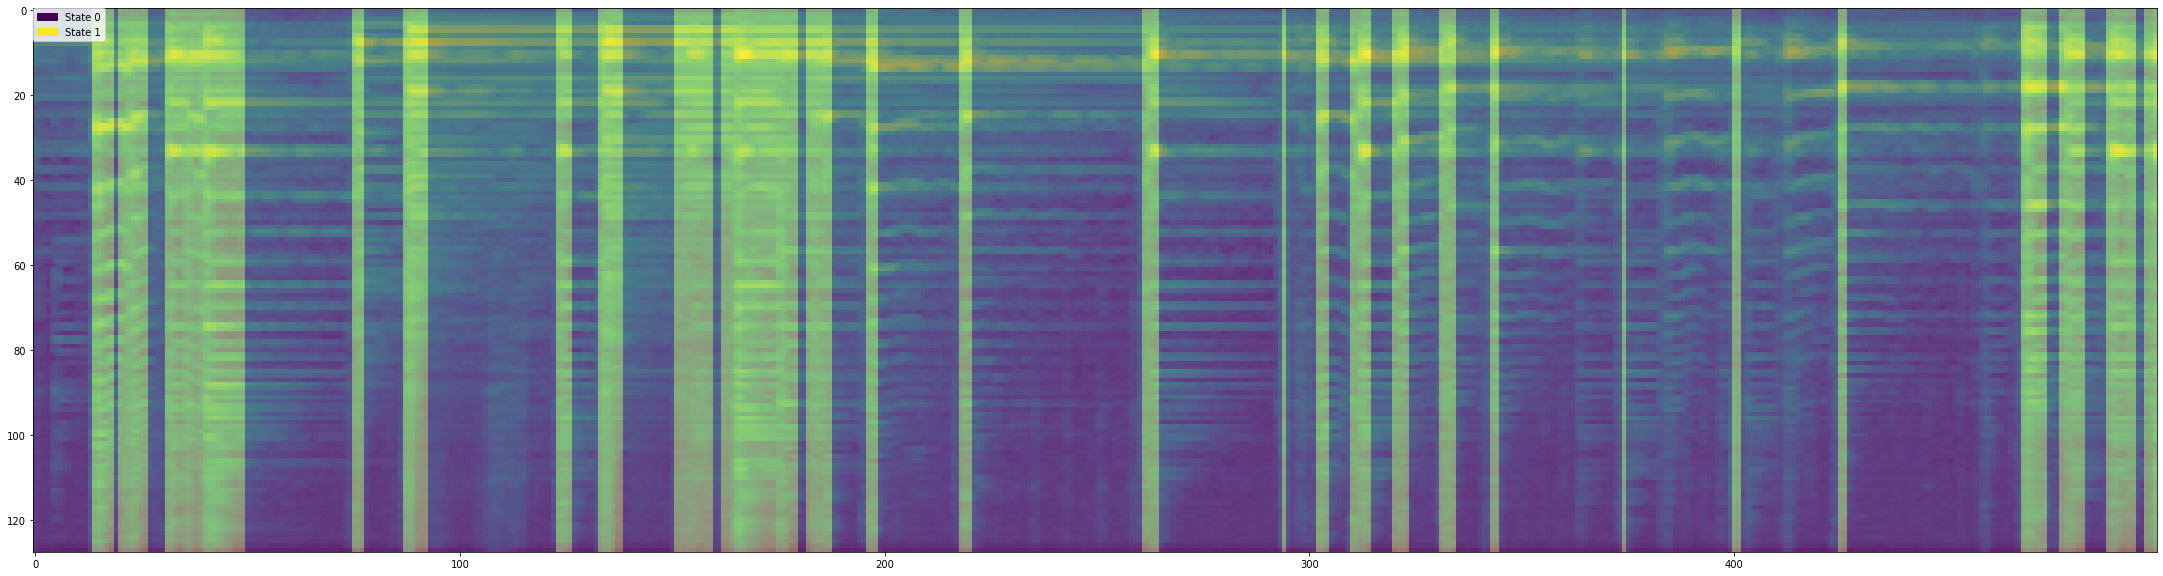

In [27]:
# we can specify a particular HMM, sample id and length to plot
# 47
# 79
# 57 looks very hard for our HMMs


vis_mel(hmm_2, melspectrograms[79], 500)

## Comparing different Gaussian emission models

We will explore Gaussian HMM models with different covariance types.

In [28]:
#* "spherical" --- each state uses a single variance value that
#      applies to all features.
hmm_3_spherical = hmm.GaussianHMM(n_components=3, verbose=True, algorithm='viterbi', n_iter=100, covariance_type='spherical', tol=0.001).fit(training_part, training_part_lengts)

         1   -82699980.9927             +nan
         2   -79943694.9501    +2756286.0427
         3   -79865747.5803      +77947.3698
         4   -79815039.8183      +50707.7620
         5   -79775264.0505      +39775.7678
         6   -79742519.2653      +32744.7852
         7   -79714806.9663      +27712.2990
         8   -79689557.0758      +25249.8905
         9   -79667209.7797      +22347.2960
        10   -79648631.2213      +18578.5584
        11   -79633861.8365      +14769.3848
        12   -79621936.1363      +11925.7002
        13   -79611894.3019      +10041.8344
        14   -79603182.3461       +8711.9558
        15   -79596420.7917       +6761.5544
        16   -79591412.4112       +5008.3805
        17   -79587510.7469       +3901.6642
        18   -79584383.6553       +3127.0917
        19   -79582114.8904       +2268.7649
        20   -79580501.6040       +1613.2864
        21   -79579417.8813       +1083.7227
        22   -79578691.8399        +726.0414
        23

In [29]:
# Score of HMM with spherical covariance type
hmm_3_spherical.score(validation_part, validation_part_lengths)

-2757667.187256109

In [30]:
# Score of HMM with diagonal covariance type
hmm_3.score(validation_part, validation_part_lengths)

-2735408.0235469863

## Sampling from HMM model, the generative process with HMM

As we know, HMM models $p(x)$ where $x$ is a sequence. We can estimate the likelihood of a sequence using forward algorithm. How about sampling a sequence from our model? Evaluating the likelihood and sampling are different procedures. HMM samples a sequence using both transition and emission models.

In [31]:
mel, path = hmm_3.sample(600)

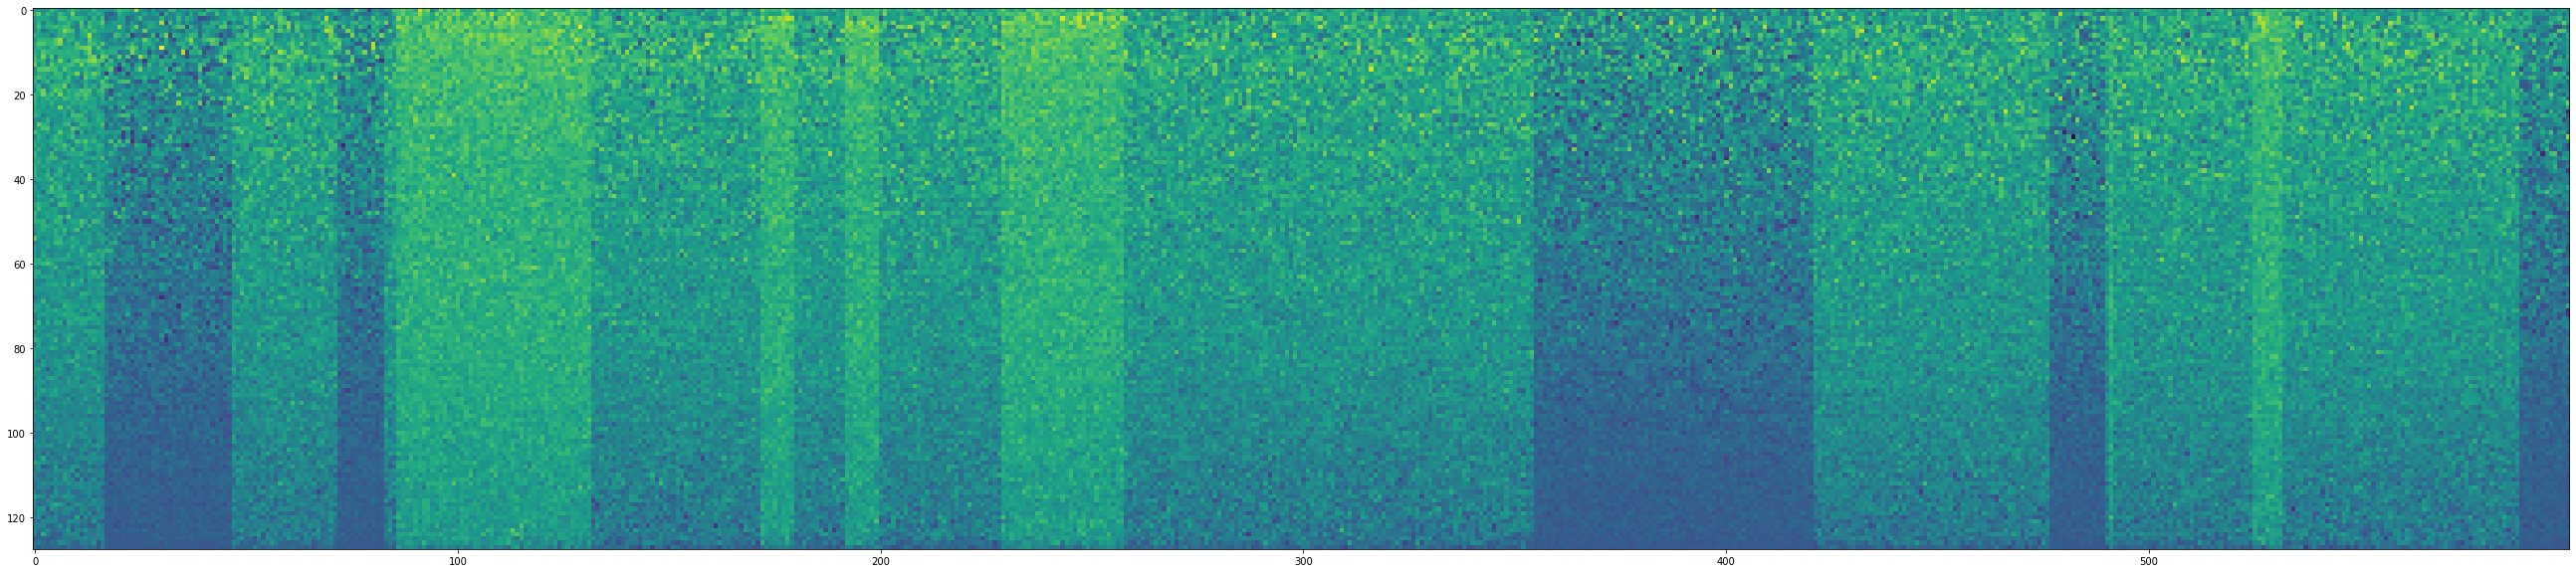

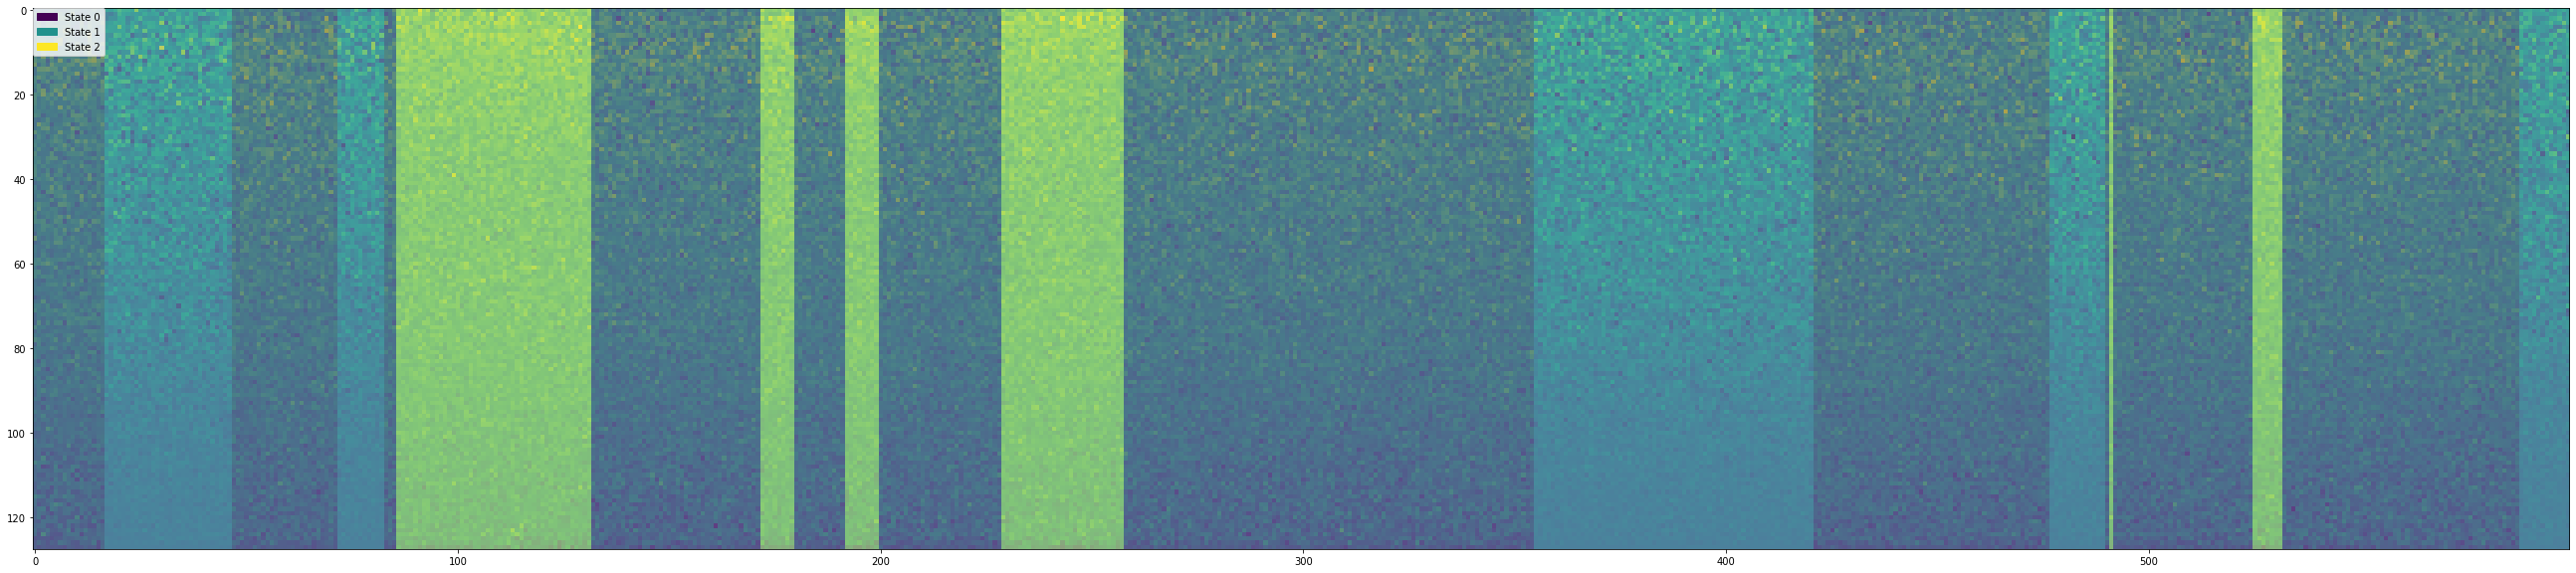

In [32]:
# Plot the observations and the sequence of predicted hidden states
vis_mel(hmm_3, mel.T, 600)

In [33]:
# Audio from mel sample
sampled_audio = librosa.feature.inverse.mel_to_audio(mel)

In [364]:
IPython.display.Audio(sampled_audio, rate=20050)

The quality of the audio sample is very poor, because:
* we have just 3 states in our HMM here
* each state is being modeled by a unimodal Gaussian distribution with diagonal covariance matrix